In [1]:
#import necessary modules
#Python >= 3.5
import sys
assert sys.version_info >= (3, 5)

#Scikit-Learn >= 0.20
import sklearn as sk
assert sk.__version__ >= "0.20"
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

#numpy for calculations
import numpy as np
import os

#matplotlib for figures
import matplotlib as mpl
import matplotlib.pyplot as plt
#a magic function that allows inline plotting so figures are rendered in this notebook
%matplotlib inline

#pandas for ...
import pandas as pd
from pandas.plotting import scatter_matrix

## Setup and Feature Statistics

In [2]:
# load data from the cv file using pandas
scores = pd.read_csv("Numeric Only Complete MCAT Data.csv", header = 1)

# rename some columns for consistency
scores.rename(columns = {'Days Before Exam':'Days Before Exam.1', 'Days Before Exam.1':'Days Before Exam.2', 'Days Before Exam.2':'Days Before Exam.3', 'Days Before Exam.3':'Days Before Exam.4'}, inplace = True)

# preview first five lines
scores.head()

,Real Score,C/P Score,CARS Score,B/B Score,P/S Score,Days Before Exam.1,Total Score,C/P Score.1,CARS Score.1,B/B Score.1,...,C/P Score.3,CARS Score.3,B/B Score.3,P/S Score.3,Days Before Exam.4,Total Score.3,C/P Score.4,CARS Score.4,B/B Score.4,P/S Score.4
0,513.0,128.0,128.0,129.0,128.0,NaN,NaN,NaN,NaN,NaN,...,128.0,128.0,128.0,126.0,16.0,506.0,127.0,127.0,125.0,127.0
1,495.0,122.0,127.0,122.0,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,522.0,130.0,129.0,131.0,132.0,5.0,519.0,129.0,129.0,129.0,...,NaN,NaN,NaN,NaN,512.0,NaN,NaN,NaN,NaN,NaN
3,515.0,128.0,129.0,128.0,130.0,7.0,515.0,129.0,128.0,128.0,...,127.0,127.0,129.0,127.0,28.0,506.0,127.0,125.0,127.0,127.0
4,522.0,131.0,131.0,130.0,130.0,8.0,519.0,131.0,129.0,128.0,...,130.0,129.0,130.0,131.0,15.0,519.0,129.0,130.0,129.0,131.0


In [3]:
# drop irrelevant columns
scores.drop(columns=['C/P Score', 'CARS Score', 'B/B Score', 'P/S Score', 'Total Score', 'Total Score.1', 'Total Score.2', 'Total Score.3'], inplace = True)

# sanity check: take a look at the data
print('Scores data shape:', scores.shape)

# look at distribution of scores
scores['Real Score'].value_counts()

# gives count, mean, standard deviation, min, max, and percentiles (including median)
scores.describe(percentiles = [0.25, 0.5, 0.75], include = 'all')

Scores data shape: (4996, 21)


,Real Score,Days Before Exam.1,C/P Score.1,CARS Score.1,B/B Score.1,P/S Score.1,Days Before Exam.2,C/P Score.2,CARS Score.2,B/B Score.2,...,Days Before Exam.3,C/P Score.3,CARS Score.3,B/B Score.3,P/S Score.3,Days Before Exam.4,C/P Score.4,CARS Score.4,B/B Score.4,P/S Score.4
count,4948.000000,1733.000000,1502.000000,1498.000000,1496.000000,1496.000000,2567.000000,2330.000000,2329.000000,2327.000000,...,3302.000000,3044.000000,3043.000000,3042.000000,3042.000000,3339.000000,3543.000000,3542.000000,3540.000000,3543.000000
mean,515.914511,8.417773,129.312250,128.403872,129.037433,129.328877,21.421504,129.054506,128.280807,129.329179,...,15.140218,128.729632,128.400920,128.880342,127.856673,15.078467,128.332487,127.830604,128.807910,128.001976
std,23.805011,16.390119,1.996091,2.083215,1.835347,1.885376,365.928234,1.919827,2.156899,1.804962,...,318.873762,1.988670,2.358199,1.905568,1.745526,673.632574,2.796926,2.901779,17.048336,6.951981
min,417.000000,0.000000,120.000000,120.000000,122.000000,122.000000,-8764.000000,121.000000,122.000000,120.000000,...,-8760.000000,118.000000,118.000000,118.000000,118.000000,-32858.000000,24.000000,31.000000,29.000000,33.000000
25%,512.000000,4.000000,128.000000,127.000000,128.000000,128.000000,6.000000,128.000000,127.000000,128.000000,...,7.000000,127.000000,127.000000,128.000000,127.000000,14.000000,127.000000,126.000000,127.000000,127.000000
50%,517.000000,6.000000,130.000000,129.000000,129.000000,130.000000,9.000000,129.000000,128.000000,130.000000,...,14.000000,129.000000,129.000000,129.000000,128.000000,22.000000,129.000000,128.000000,129.000000,128.000000
75%,520.000000,7.000000,131.000000,130.000000,130.000000,131.000000,14.000000,130.000000,130.000000,131.000000,...,21.000000,130.000000,130.000000,130.000000,129.000000,34.000000,130.000000,130.000000,130.000000,129.000000
max,2115.000000,365.000000,132.000000,132.000000,132.000000,132.000000,10227.000000,132.000000,132.000000,132.000000,...,6712.000000,132.000000,132.000000,132.000000,132.000000,6712.000000,132.000000,132.000000,1130.000000,514.000000


## Clean Data

In [4]:
# drop rows with impossible values
#                # days before exam > 180
#                # exact duplicate values to another row
#                # impossible scores (>528 total or >132 on any subsection)
remove_indices = []
remove_indices.extend(scores[scores['Real Score']>528].index.values)
remove_indices.extend(scores[scores['Real Score']<472].index.values)
for i in range(1, 5):
    remove_indices.extend(scores[scores['Days Before Exam.'+str(i)]>200].index.values)
    remove_indices.extend(scores[scores['Days Before Exam.'+str(i)]<0].index.values)
    remove_indices.extend(scores[scores['C/P Score.'+str(i)]>132].index.values)
    remove_indices.extend(scores[scores['C/P Score.'+str(i)]<118].index.values)
    remove_indices.extend(scores[scores['CARS Score.'+str(i)]>132].index.values)
    remove_indices.extend(scores[scores['CARS Score.'+str(i)]<118].index.values)
    remove_indices.extend(scores[scores['B/B Score.'+str(i)]>132].index.values)
    remove_indices.extend(scores[scores['B/B Score.'+str(i)]<118].index.values)
    remove_indices.extend(scores[scores['P/S Score.'+str(i)]>132].index.values)
    remove_indices.extend(scores[scores['P/S Score.'+str(i)]<118].index.values)

# remove duplicate indices
remove_indices = list(dict.fromkeys(remove_indices))

# delete all rows with impossible values
for i in remove_indices:
    scores.drop(i, axis = 0, inplace = True)

scores.info()
scores.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4827 entries, 0 to 4995
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Real Score          4779 non-null   float64
 1   Days Before Exam.1  1690 non-null   float64
 2   C/P Score.1         1473 non-null   float64
 3   CARS Score.1        1469 non-null   float64
 4   B/B Score.1         1467 non-null   float64
 5   P/S Score.1         1467 non-null   float64
 6   Days Before Exam.2  2461 non-null   float64
 7   C/P Score.2         2251 non-null   float64
 8   CARS Score.2        2250 non-null   float64
 9   B/B Score.2         2249 non-null   float64
 10  P/S Score.2         2252 non-null   float64
 11  Days Before Exam.3  3158 non-null   float64
 12  C/P Score.3         2935 non-null   float64
 13  CARS Score.3        2934 non-null   float64
 14  B/B Score.3         2933 non-null   float64
 15  P/S Score.3         2933 non-null   float64
 16  Days B

,Real Score,Days Before Exam.1,C/P Score.1,CARS Score.1,B/B Score.1,P/S Score.1,Days Before Exam.2,C/P Score.2,CARS Score.2,B/B Score.2,...,Days Before Exam.3,C/P Score.3,CARS Score.3,B/B Score.3,P/S Score.3,Days Before Exam.4,C/P Score.4,CARS Score.4,B/B Score.4,P/S Score.4
0,513.0,NaN,NaN,NaN,NaN,NaN,5.0,128.0,128.0,129.0,...,11.0,128.0,128.0,128.0,126.0,16.0,127.0,127.0,125.0,127.0
1,495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,515.0,7.0,129.0,128.0,128.0,130.0,14.0,127.0,126.0,128.0,...,21.0,127.0,127.0,129.0,127.0,28.0,127.0,125.0,127.0,127.0
4,522.0,8.0,131.0,129.0,128.0,131.0,11.0,131.0,128.0,128.0,...,4.0,130.0,129.0,130.0,131.0,15.0,129.0,130.0,129.0,131.0
5,524.0,6.0,131.0,130.0,132.0,131.0,10.0,131.0,127.0,131.0,...,24.0,132.0,130.0,130.0,130.0,90.0,130.0,128.0,130.0,131.0


## Visualize and Handle Missing Data

<AxesSubplot:>

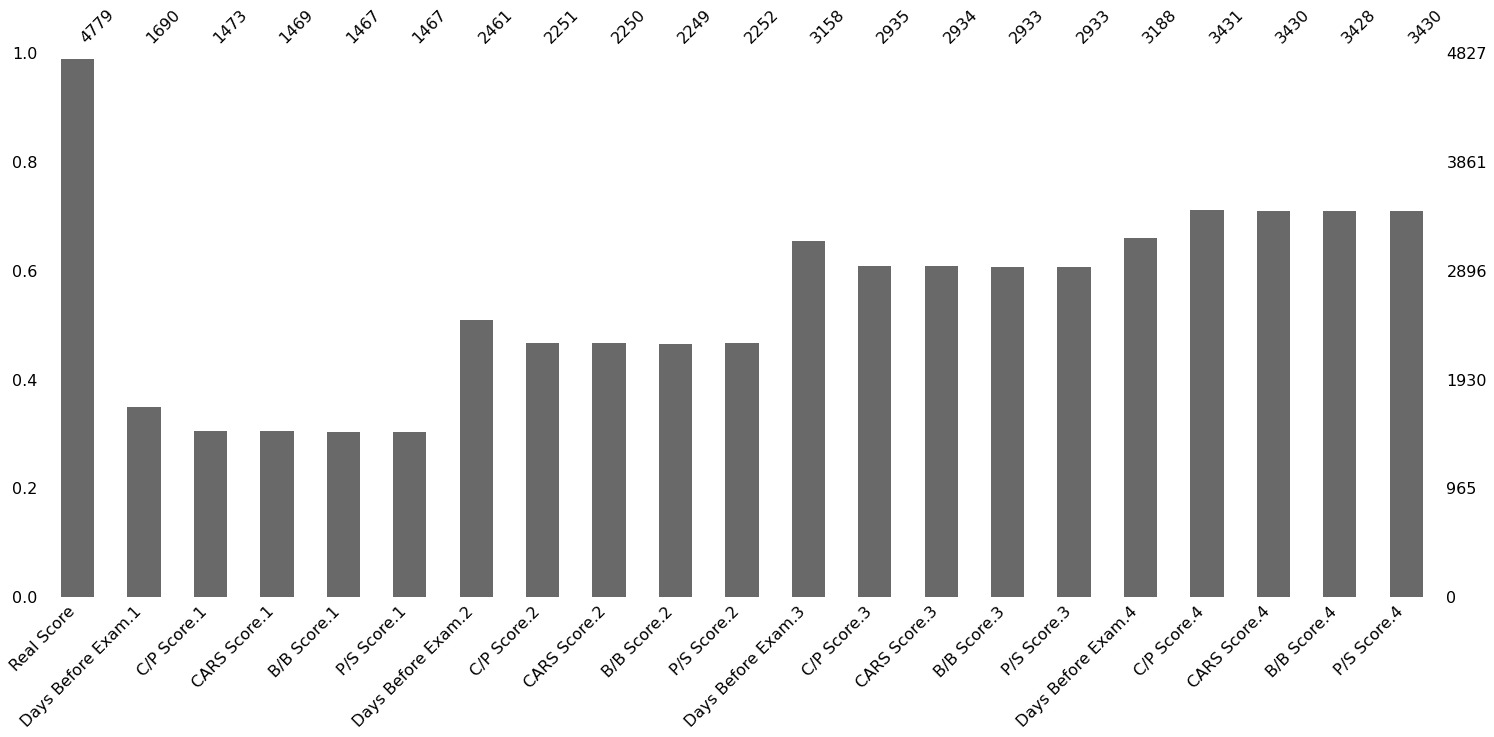

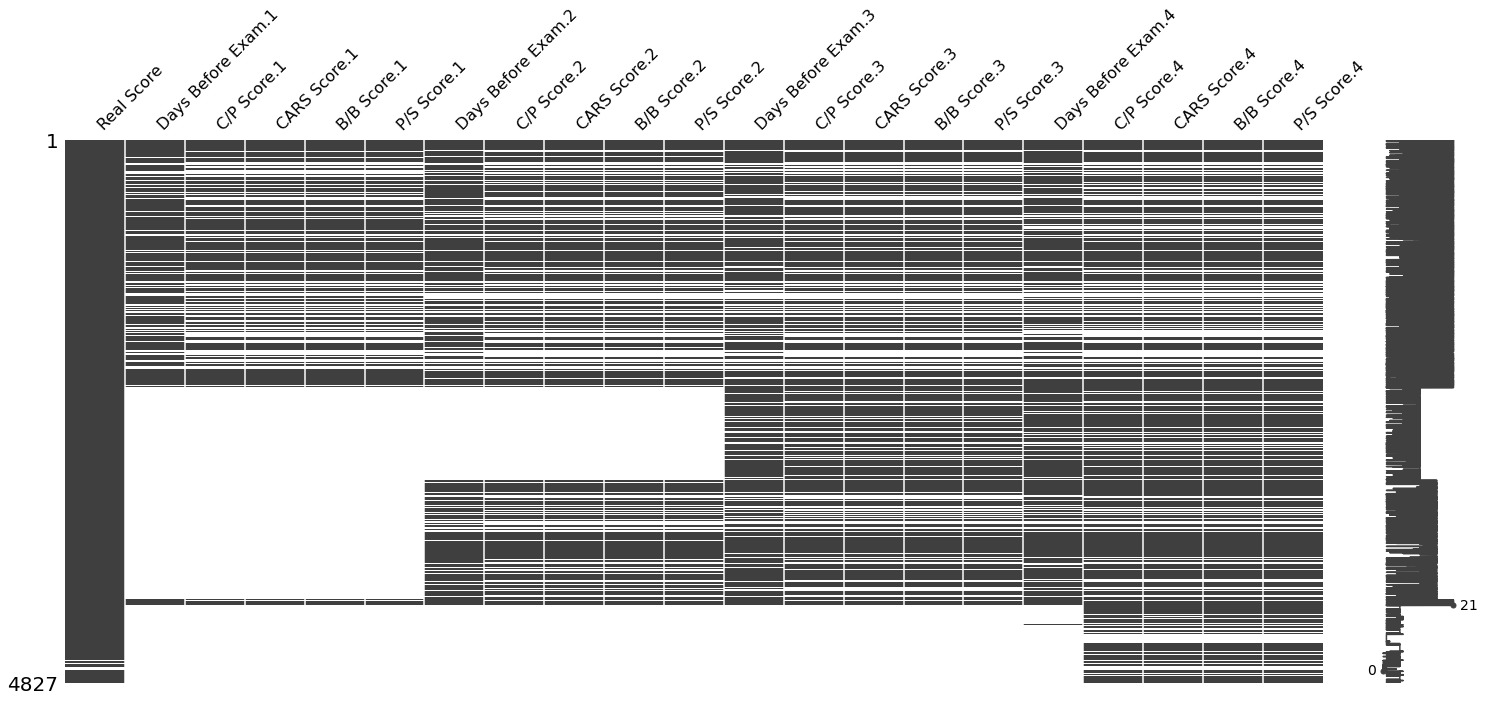

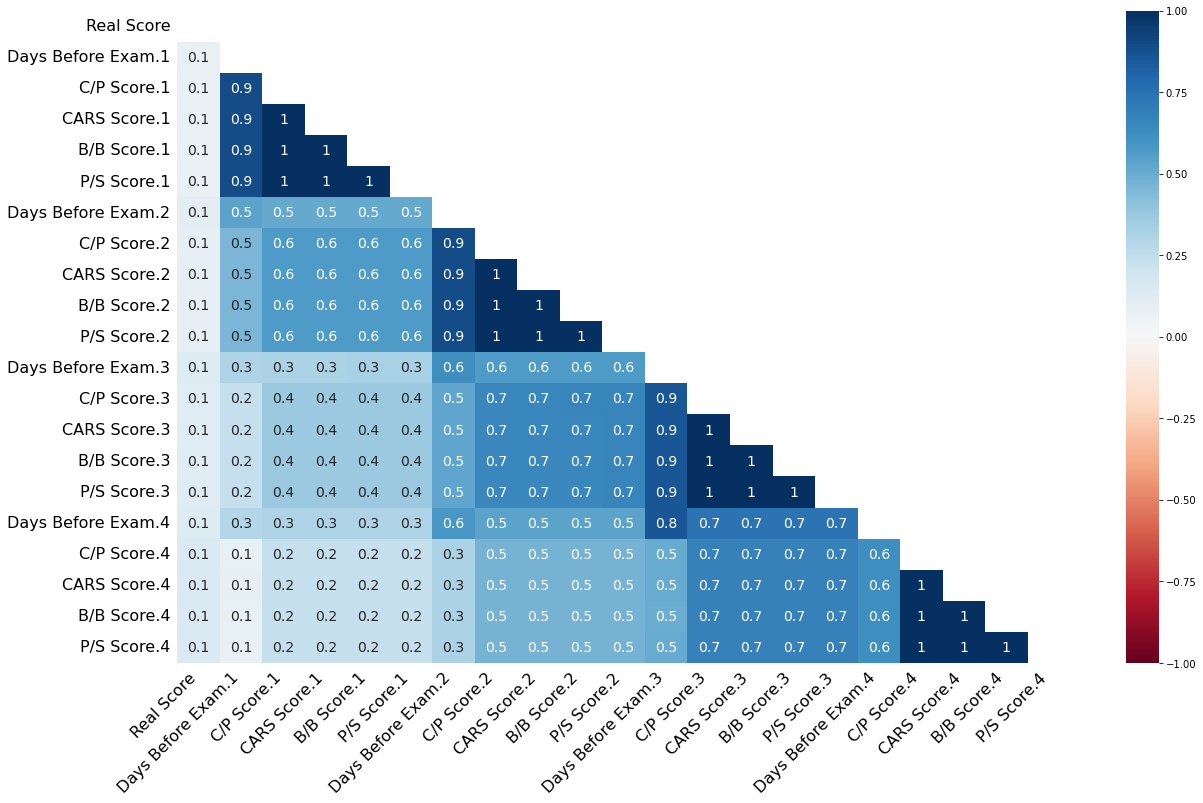

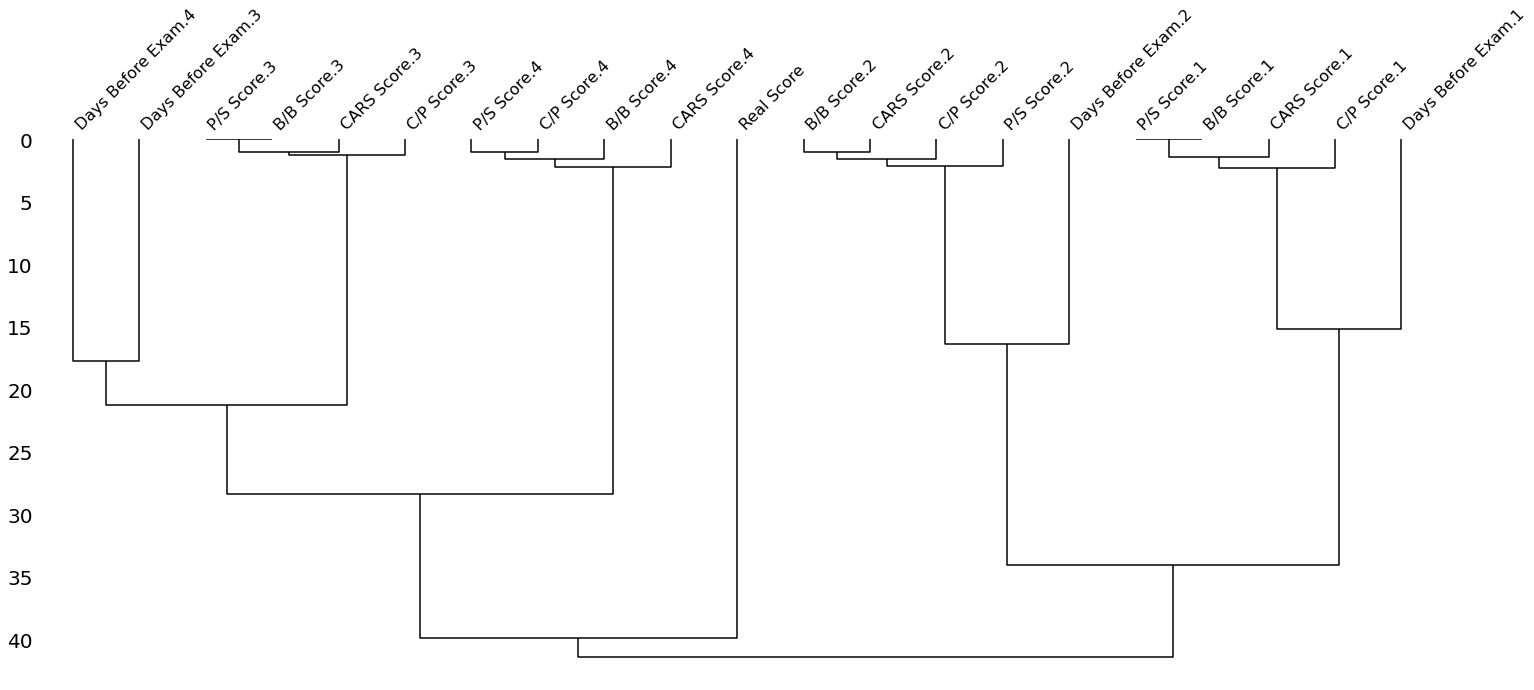

In [5]:
# pip install missingno
import missingno as msno

# visualize missing data with Missingno
msno.bar(scores)
msno.matrix(scores)

# see if there is a reason for missing data
msno.heatmap(scores)
msno.dendrogram(scores)

## Impute Missing Values

In [6]:
from sklearn.impute import KNNImputer

# Init the transformer
knn_imp = KNNImputer(n_neighbors=3)

# Fit/transform
scores.loc[:, :] = knn_imp.fit_transform(scores)

In [7]:
# print number of columns, column labels, column data types, memory usage, range index, and non-null number of cells in each column
scores.info()

# preview data
scores.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4827 entries, 0 to 4995
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Real Score          4827 non-null   float64
 1   Days Before Exam.1  4827 non-null   float64
 2   C/P Score.1         4827 non-null   float64
 3   CARS Score.1        4827 non-null   float64
 4   B/B Score.1         4827 non-null   float64
 5   P/S Score.1         4827 non-null   float64
 6   Days Before Exam.2  4827 non-null   float64
 7   C/P Score.2         4827 non-null   float64
 8   CARS Score.2        4827 non-null   float64
 9   B/B Score.2         4827 non-null   float64
 10  P/S Score.2         4827 non-null   float64
 11  Days Before Exam.3  4827 non-null   float64
 12  C/P Score.3         4827 non-null   float64
 13  CARS Score.3        4827 non-null   float64
 14  B/B Score.3         4827 non-null   float64
 15  P/S Score.3         4827 non-null   float64
 16  Days B

,Real Score,Days Before Exam.1,C/P Score.1,CARS Score.1,B/B Score.1,P/S Score.1,Days Before Exam.2,C/P Score.2,CARS Score.2,B/B Score.2,...,Days Before Exam.3,C/P Score.3,CARS Score.3,B/B Score.3,P/S Score.3,Days Before Exam.4,C/P Score.4,CARS Score.4,B/B Score.4,P/S Score.4
0,513.0,5.666667,127.666667,127.666667,129.000000,128.333333,5.000000,128.000000,128.0,129.000000,...,11.0,128.000000,128.000000,128.000000,126.000000,16.000000,127.0,127.000000,125.000000,127.0
1,495.0,2.666667,127.666667,125.333333,129.333333,126.000000,3.333333,123.666667,125.0,124.666667,...,27.0,125.333333,125.666667,124.666667,124.666667,5.666667,124.0,123.666667,126.666667,125.0
3,515.0,7.000000,129.000000,128.000000,128.000000,130.000000,14.000000,127.000000,126.0,128.000000,...,21.0,127.000000,127.000000,129.000000,127.000000,28.000000,127.0,125.000000,127.000000,127.0
4,522.0,8.000000,131.000000,129.000000,128.000000,131.000000,11.000000,131.000000,128.0,128.000000,...,4.0,130.000000,129.000000,130.000000,131.000000,15.000000,129.0,130.000000,129.000000,131.0
5,524.0,6.000000,131.000000,130.000000,132.000000,131.000000,10.000000,131.000000,127.0,131.000000,...,24.0,132.000000,130.000000,130.000000,130.000000,90.000000,130.0,128.000000,130.000000,131.0


In [8]:
# define features and labels from the observations
features = scores.columns[1:len(scores)]
X = scores[features].values.reshape(-1, len(features))
y = scores["Real Score"].to_numpy()
print(X.shape,y.shape)

(4827, 20) (4827,)


# Split data into train and test sets

In [9]:
from sklearn.model_selection import train_test_split
from scipy.stats import ks_2samp

#split data into training and testing, fix random_state so output is the same every run
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,
                                   test_size=0.20, random_state=5)

#We define a function to see if our two sets are distributed evenly for every features
def check_distributions(X1,X2):
    pVals = np.zeros((X1.shape[1]))
    for i in np.arange(X1.shape[1]):
        kstat,pvalue = ks_2samp(X1[:,i],X2[:,i])
        pVals[i]=pvalue
    print("Mean of pvalues :", np.mean(pVals))
    print("Smallest pvalue :",np.amin(pVals)) 
    #return(pVals)

#sanity check: look at how many data points are in train/test and if our pvalues are acceptable
print(X_train.shape[0])
print(X_test.shape[0])
check_distributions(X_train,X_test)

3861
966
Mean of pvalues : 0.7523720619673906
Smallest pvalue : 0.1130579326297521


## Visualize Correlations

array([[<AxesSubplot:xlabel='Real Score', ylabel='Real Score'>,
        <AxesSubplot:xlabel='CARS Score.1', ylabel='Real Score'>,
        <AxesSubplot:xlabel='CARS Score.2', ylabel='Real Score'>,
        <AxesSubplot:xlabel='CARS Score.3', ylabel='Real Score'>,
        <AxesSubplot:xlabel='CARS Score.4', ylabel='Real Score'>],
       [<AxesSubplot:xlabel='Real Score', ylabel='CARS Score.1'>,
        <AxesSubplot:xlabel='CARS Score.1', ylabel='CARS Score.1'>,
        <AxesSubplot:xlabel='CARS Score.2', ylabel='CARS Score.1'>,
        <AxesSubplot:xlabel='CARS Score.3', ylabel='CARS Score.1'>,
        <AxesSubplot:xlabel='CARS Score.4', ylabel='CARS Score.1'>],
       [<AxesSubplot:xlabel='Real Score', ylabel='CARS Score.2'>,
        <AxesSubplot:xlabel='CARS Score.1', ylabel='CARS Score.2'>,
        <AxesSubplot:xlabel='CARS Score.2', ylabel='CARS Score.2'>,
        <AxesSubplot:xlabel='CARS Score.3', ylabel='CARS Score.2'>,
        <AxesSubplot:xlabel='CARS Score.4', ylabel='CARS Score

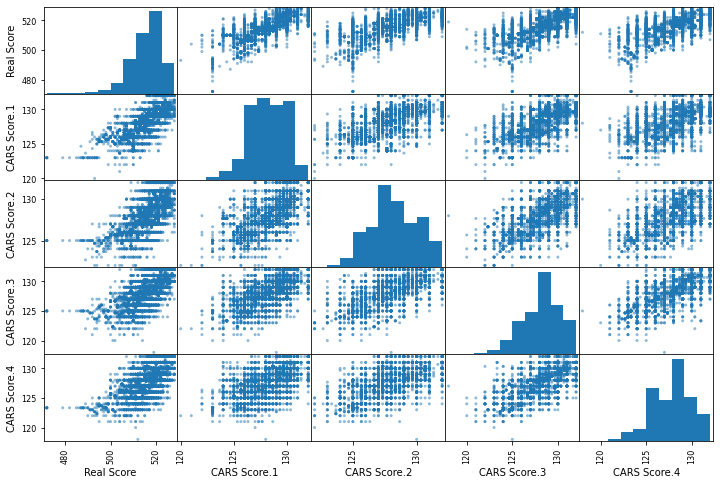

In [10]:
# create a correlation matrix with pandas
corr_matrix = scores.corr()
corr_matrix['Real Score'].sort_values(ascending=False)

# create scatter matrices displaying totals, medians.
from pandas.plotting import scatter_matrix

attributes = ['Real Score', 'CARS Score.1', 'CARS Score.2', 'CARS Score.3', 'CARS Score.4']
scatter_matrix(scores[attributes], figsize=(12, 8))

# Linear Regression
## Define Model Validation Function

In [11]:
def model_validation(X, y, results_list, scores_list):
    lin_reg = LinearRegression()
    scoring = "neg_mean_squared_error"
    results_dictionary = cross_validate(lin_reg, X, y, scoring=scoring, cv=4, return_estimator=True)
    results_list.append(results_dictionary)
    mean_score = results_dictionary["test_score"].mean()
    scores_list.append(mean_score)

## PCA to Create Linear Combinations of Features

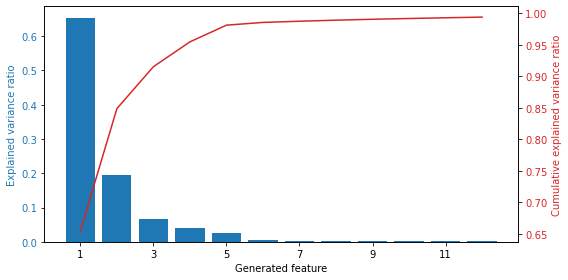

In [12]:
from sklearn.decomposition import PCA

# fit the PCA
N = 12
pca = PCA(n_components=N)
pca.fit_transform(X_train)

# plot the explained variances
fig, ax1 = plt.subplots(figsize=(8, 4))
color = 'tab:blue'
ax1.bar(1+np.arange(N), pca.explained_variance_ratio_, color=color)
ax1.set_xticks(1+np.arange(N, step=2))
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel("Explained variance ratio", color=color)
ax1.set_xlabel("Generated feature")

ax2 = ax1.twinx()
color = 'tab:red'
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(1+np.arange(N), np.cumsum(pca.explained_variance_ratio_), color=color)
ax2.set_ylabel("Cumulative explained variance ratio", color=color)
fig.tight_layout()
plt.show()

## K-fold Cross Validation

In [13]:
# results stores the dictionary returned by the cross validation
# results thus becomes a list of dictionaries
# nmse stores the *mean* of all the neg_mean_squared_error's from each of k runs
results = []
nmse = []

# Linear Regression without Dimensionality Reduction
model_validation(X_train, y_train, results, nmse)
# Linear Regression with Dimensionality Reduction
for n in range(X_train.shape[1]):
    pca = PCA(n_components=n+1)
    X_train_reduced = pca.fit_transform(X_train)
    model_validation(X_train_reduced, y_train, results, nmse)
# Display the results
for i in range(0, len(nmse), 1):
    if i == 0:
        print("neg mean squared error of linear regression: ", nmse[i])
    else:
        print("neg mean squared error of linear regression with ", i, " dimensions is ", nmse[i])

neg mean squared error of linear regression:  -7.642995892489457
neg mean squared error of linear regression with  1  dimensions is  -47.03356814929124
neg mean squared error of linear regression with  2  dimensions is  -47.017047230600845
neg mean squared error of linear regression with  3  dimensions is  -46.840557909444485
neg mean squared error of linear regression with  4  dimensions is  -46.848859263427116
neg mean squared error of linear regression with  5  dimensions is  -8.162376250598557
neg mean squared error of linear regression with  6  dimensions is  -8.13284584395111
neg mean squared error of linear regression with  7  dimensions is  -7.9577057066217325
neg mean squared error of linear regression with  8  dimensions is  -7.899600720873799
neg mean squared error of linear regression with  9  dimensions is  -7.898065980293486
neg mean squared error of linear regression with  10  dimensions is  -7.888334681659854
neg mean squared error of linear regression with  11  dimensi

# Random Forest

## K-fold Cross Validation

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data and validate data using k-fold cross validation
scoring = "neg_mean_squared_error"
rf_results_dictionary = cross_validate(rf, X_train, y_train, scoring=scoring, cv=4, return_estimator=True)
rf_mean_score = rf_results_dictionary["test_score"].mean()
print(rf_mean_score)

-4.237834458398327


# Evaluate the Metrics of the Best Model

In [15]:
#The choosed model is PCA with 10 components
pca = PCA(n_components=10)
X_train_reduced = pca.fit_transform(X_train)

# train the model on all the training data
lin_reg1 = LinearRegression()
lin_reg1 = lin_reg1.fit(X_train_reduced, y_train)

# transform the testing data to the same space as the training data
X_test_reduced = pca.transform(X_test)

# evaluate the model's accuracy using the test data
R2 = lin_reg1.score(X_test_reduced, y_test)
print(f"The coefficient of determination: {R2:.2f}")

# use loss function on prediction vs. test
y_pred = lin_reg1.predict(X_test_reduced)
mse = mean_squared_error(y_test, y_pred)
print("neg mean squared error of the final ML model: ", -mse)

The coefficient of determination: 0.84
neg mean squared error of the final ML model:  -7.4698698824296


In [16]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
print("neg mean squared error of the final ML model: ", -mse)

neg mean squared error of the final ML model:  -4.792460899661642


# Data visualisation

(4827, 20)


<Figure size 432x288 with 0 Axes>

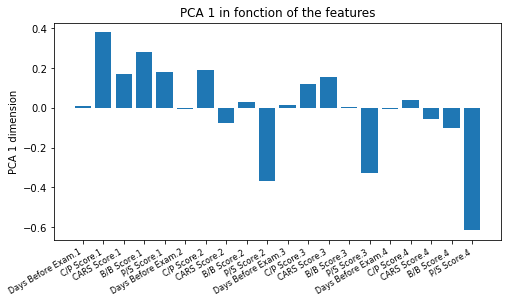

In [17]:
#Display what pca 1 is
plt.figure()

print(X.shape)
D,E = np.linalg.eig(np.matmul(X.T,X))
#print(D)
#print(D.shape)
#E = E.reshape()
z = list(scores.columns[1:])#np.arange(1,21)
#print(z)

fig, ax = plt.subplots(figsize= (8,4))
# We see that the highest eigenvalue is D[7] so row 7 of E is 
ax.bar(z, E[:,7])#, label=bar_labels, color=bar_colors)

ax.set_ylabel('PCA 1 dimension')
ax.set_title('PCA 1 as a function of the features')
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right',fontsize=8)
#ax.legend(title='Fruit color')

plt.show()

#plt.plot(z,E[0,:])

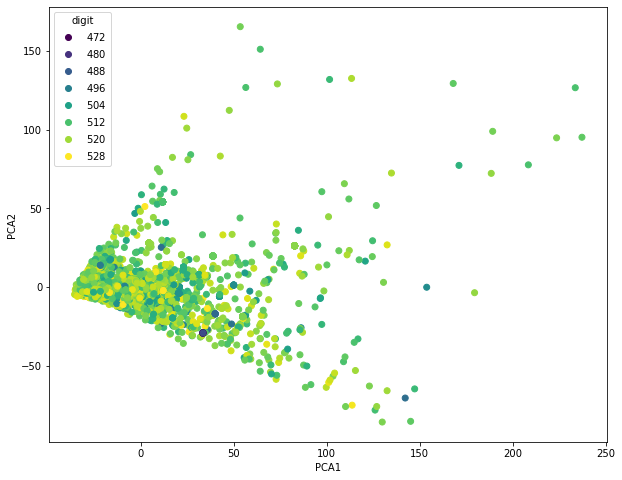

In [18]:
plt.figure(figsize=(10, 8))
# convert the labels to numbers, each will be assigned a separate color based on the cmap specified
colors = [int(x) for x in y_train]
sc = plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=colors)#,s=1 cmap='tab10')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(*sc.legend_elements(), title='digit')
plt.show()


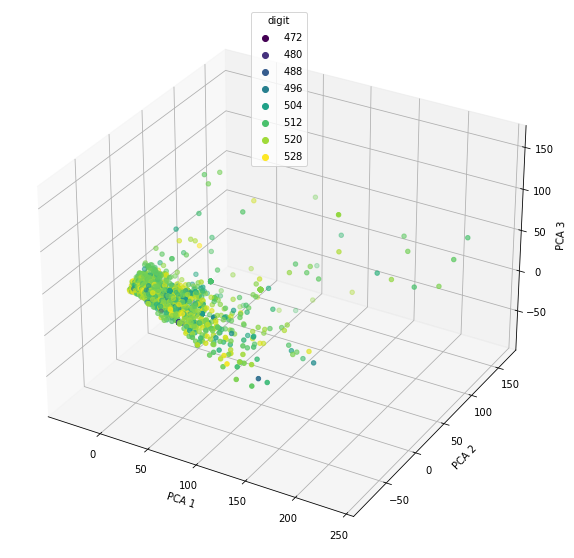

In [19]:
#3D plotting
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], X_train_reduced[:,2], c=colors)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.legend(*sc.legend_elements(), title='digit',loc="upper center")
plt.show()


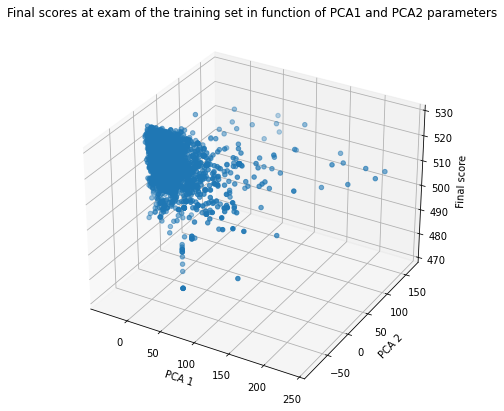

In [20]:
#3D plotting
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], y_train)#, c=colors)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel("Final score")
#plt.legend(*sc.legend_elements(), title='digit',loc="upper center")
plt.title("Final scores at exam of the training set in function of PCA1 and PCA2 parameters")
plt.show()


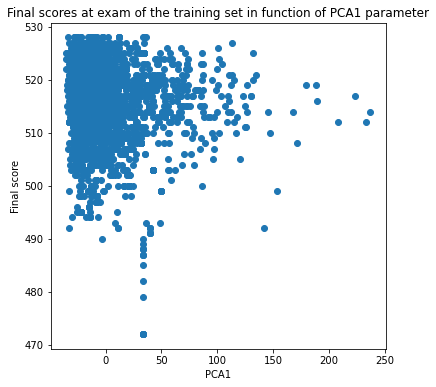

In [21]:
plt.figure(figsize=(6, 6))
# convert the labels to numbers, each will be assigned a separate color based on the cmap specified
colors = [int(x) for x in y_train]
sc = plt.scatter(X_train_reduced[:, 0],y_train)#, c=colors)#,s=1 cmap='tab10')
plt.xlabel("PCA1")
plt.ylabel("Final score")
#plt.legend(*sc.legend_elements(), title='digit')
plt.title("Final scores at exam of the training set in function of PCA1 parameter")
plt.show()


## Visualize RF Tree

[Text(0.3700536483373397, 0.975, 'CARS Score.1 <= 127.833\nsquared_error = 48.87\nsamples = 2448\nvalue = 515.515'),
 Text(0.12593249198717948, 0.925, 'B/B Score.3 <= 126.5\nsquared_error = 43.213\nsamples = 896\nvalue = 509.569'),
 Text(0.052924679487179487, 0.875, 'B/B Score.4 <= 120.833\nsquared_error = 56.115\nsamples = 241\nvalue = 503.187'),
 Text(0.038878205128205126, 0.825, 'Days Before Exam.1 <= 5.0\nsquared_error = 35.747\nsamples = 11\nvalue = 483.05'),
 Text(0.0378525641025641, 0.775, 'squared_error = 0.0\nsamples = 1\nvalue = 487.0'),
 Text(0.03990384615384615, 0.775, 'squared_error = 36.765\nsamples = 10\nvalue = 482.842'),
 Text(0.06697115384615385, 0.825, 'P/S Score.1 <= 127.833\nsquared_error = 33.86\nsamples = 230\nvalue = 504.287'),
 Text(0.04195512820512821, 0.775, 'CARS Score.2 <= 125.5\nsquared_error = 22.087\nsamples = 158\nvalue = 501.973'),
 Text(0.02294871794871795, 0.725, 'CARS Score.4 <= 123.833\nsquared_error = 19.323\nsamples = 64\nvalue = 498.453'),
 Text

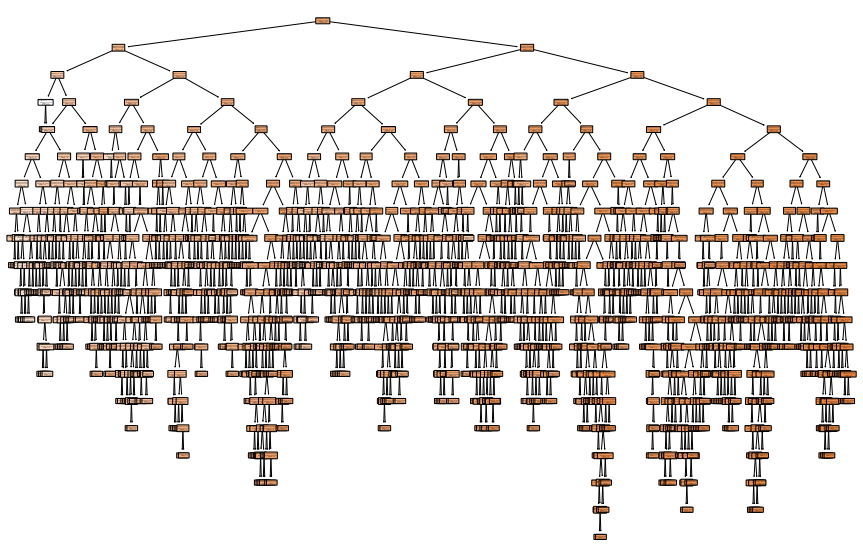

In [22]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0], 
          feature_names = features,
          filled = True, impurity = True, 
          rounded = True)

#from sklearn.tree import export_text

#print(export_text(rf.estimators_[0], 
                  #spacing=3, decimals=3,
                  #feature_names=features))

In [23]:
#conda uninstall python-graphviz
#conda uninstall graphviz
#pip install dtreeviz             # install dtreeviz for sklearn
#pip install dtreeviz[xgboost]    # install XGBoost related dependency
#pip install dtreeviz[pyspark]    # install pyspark related dependency
#pip install dtreeviz[lightgbm]   # install LightGBM related dependency
#pip install graphviz

In [ ]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(rf.estimators_[0], X_train, y_train,
               target_name = "Real MCAT Score",
               feature_names = features,
               title = "Decision Tree for MCAT Scores")

viz.save("MCAT_decision_tree_with_imputation.svg")            

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
